# 神经网络和机器学习之鸢尾花分类

案例说明：鸢尾花(Iris)分类，使用全连接神经网络层。

鸢(yuān)尾花分类相当于机器学习中的Helloworld问题。鸢尾花可以分为很多类，一般通过花萼长度、花萼宽度、花瓣长度、花瓣宽度进行区分。我们让机器来学习关于这个鸢尾花分类的一组数据，然后建立模型，训练。后面直接给出花的四个特征，让机器判断花的分类。

案例选择了keras框架，需要先安装keras和tensorflow。虚谷号教育版已经预装必要的库，可以直接使用。

本案例已经提供了训练好的模型，放在model文件夹中，文件名称为：2-model-vv.h5。如果想直接测试模型，请跳到“导入模型”环节，输入数据开始识别。

## 1.环境搭建

下面是安装命令：

pip install keras

pip install -i https://pypi.tuna.tsinghua.edu.cn/simple tensorflow

建议选择清华源，速度将快很多。参考命令如下：

pip install -i https://pypi.tuna.tsinghua.edu.cn/simple tensorflow

## 2.数据准备


鸢尾花分类数据集在`data`中，文件名称为`iris.csv`。数据分为5列，前4列为花萼长度，花萼宽度，花瓣长度，花瓣宽度等4个用于识别鸢尾花的属性，第5列为鸢尾花的类别（包括Setosa，Versicolour，Virginica三类）。

这个数据集可以从UCI数据集上直接下载，具体地址为：http://archive.ics.uci.edu/ml/datasets/Iris
打开页面后点击Datafolder就可以下载到本地磁盘上，默认格式为逗号分隔的文本文件。

也可以直接从sklearn包里datasets里导入，语法为：from sklearn.datasets import load_iris。
如果从本地磁盘上读入该数据集，可以采用pandas包里的read_excel或者read_csv方法，也可以利用python里面的csv包来处理。

开始导入数据集吧。

In [2]:
import pandas as pd
data=pd.read_csv('./data/iris.csv')

该问题属于比较典型的多分类问题，因此在训练数据预处理中，首先对分类结果标签"Species"进行独热编码化。所谓独热编码(One-Hot)，是指用0/1构成的数组来表示一种情况，比如在鸢尾花分类中，顺序编码可以用0、1、2来表示不同的鸢尾花品种，而独热编码可以用[1,0,0]表示setosa，用[0,1,0]表示versicolor,用[0,0,1]表示virginica。独热编码相对于顺序编码避免了神经网络把没有数值大小意义的数据错误的理解为有数值意义。比如如果用顺序编码来表示鸢尾花品种，神经网络会错误的认为2表示的品种与0表示的品种之间的差距比较大，而与1表示的品种差距比较小。

In [54]:
data=pd.get_dummies(data,columns=['Species']) #把种类(列名称为“Species”)进行独热编码
x=data[['Sepal.Length', 'Sepal.Width', 'Petal.Length','Petal.Width']]
y=data.iloc[:,-3:]

此时x与y的形状分别是(150,3)和(150,1)，即x具有150行、3列，y具有150行、1列。其中x是输入的数据(鸢尾花的属性)，y是输出的结果(鸢尾花的类别)。
输出来看一下，你会发现x与y的行数一定是相同的。

In [55]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,4.6,3.1,1.5,0.2,1,0,0
1,5.5,2.6,4.4,1.2,0,1,0
2,6.1,2.6,5.6,1.4,0,0,1
3,7.2,3.0,5.8,1.6,0,0,1
4,5.2,3.4,1.4,0.2,1,0,0


In [56]:
data.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
145,6.9,3.1,5.4,2.1,0,0,1
146,6.0,3.0,4.8,1.8,0,0,1
147,6.9,3.1,5.1,2.3,0,0,1
148,5.1,3.7,1.5,0.4,1,0,0
149,5.4,3.9,1.7,0.4,1,0,0


In [5]:
len(x),len(y)

(150, 150)

## 3.建立模型

多分类问题是二分类问题的扩展。当分类数大于2时，就是多分类问题。比如把笔分成铅笔、圆珠笔、钢笔等等，就是多分类问题。多分类问题需要神经网络将最后一层神经元个数设置为与分类数目相同以输出一个数组，这个数组的长度就是分类数目，数组中每个数值对应在不同类别上的可能性。一般的，多分类问题通过softmax函数激活，损失函数使用类别交叉熵损失(categorical_crossentropy)。

keras支持很多类型的神经网络层，这里使用add方法添加2个全连接神经网络层（Dense层）。
第一层通过input_dim参数指定接收输入数据的维度为4（鸢尾花的属性），units=8表示将这个4维数据全连接到8个神经元，activation定义了激活函数为relu。第二层神经元，也就是最后一层神经元的个数设置要和分类的数目相同，所以设置为3，激活函数为softmax。

代码如下：

In [6]:
import keras
from keras import layers

Using TensorFlow backend.


In [7]:
model=keras.models.Sequential()
model.add(layers.Dense(units=8, input_dim=4, activation='relu'))
model.add(layers.Dense(units=3, activation='softmax'))

定义好模型的层之后，需要对模型进行编译，同时指定训练模型所需要的优化器以及损失的估算方法。在keras中，可以通过optimizer参数来指定优化器。这里选择了adam。loss定义了损失函数为category_crossentropy。

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy')

## 4.训练模型

最后对模型进行训练，一下代码利用现有数据x和y对模型进行训练500次，epochs表示训练轮次，batch_size表示每次有多少行数据参与训练，最后把整个训练过程记录到history中。程序运行后，在控制台会打印出每轮次的训练情况。

In [9]:
history=model.fit(x,y,batch_size=150,epochs=500)

Epoch 1/500
150/150 [==============================] - 1s 8ms/step - loss: 2.4921
Epoch 2/500
150/150 [==============================] - 0s 82us/step - loss: 2.4746
Epoch 3/500
150/150 [==============================] - 0s 72us/step - loss: 2.4545
Epoch 4/500
150/150 [==============================] - 0s 57us/step - loss: 2.4312
Epoch 5/500
150/150 [==============================] - 0s 126us/step - loss: 2.4080
Epoch 6/500
150/150 [==============================] - 0s 57us/step - loss: 2.3849
Epoch 7/500
150/150 [==============================] - 0s 56us/step - loss: 2.3620
Epoch 8/500
150/150 [==============================] - 0s 56us/step - loss: 2.3392
Epoch 9/500
150/150 [==============================] - 0s 59us/step - loss: 2.3165
Epoch 10/500
150/150 [==============================] - 0s 56us/step - loss: 2.2942
Epoch 11/500
150/150 [==============================] - 0s 61us/step - loss: 2.2718
Epoch 12/500
150/150 [==============================] - 0s 86us/step - loss: 2.2496
E

Epoch 99/500
150/150 [==============================] - 0s 83us/step - loss: 1.0129
Epoch 100/500
150/150 [==============================] - 0s 64us/step - loss: 1.0075
Epoch 101/500
150/150 [==============================] - 0s 72us/step - loss: 1.0023
Epoch 102/500
150/150 [==============================] - 0s 90us/step - loss: 0.9972
Epoch 103/500
150/150 [==============================] - 0s 72us/step - loss: 0.9923
Epoch 104/500
150/150 [==============================] - 0s 67us/step - loss: 0.9874
Epoch 105/500
150/150 [==============================] - 0s 62us/step - loss: 0.9827
Epoch 106/500
150/150 [==============================] - 0s 70us/step - loss: 0.9781
Epoch 107/500
150/150 [==============================] - 0s 79us/step - loss: 0.9736
Epoch 108/500
150/150 [==============================] - 0s 68us/step - loss: 0.9693
Epoch 109/500
150/150 [==============================] - 0s 75us/step - loss: 0.9650
Epoch 110/500
150/150 [==============================] - 0s 65us/s

Epoch 196/500
150/150 [==============================] - 0s 79us/step - loss: 0.7797
Epoch 197/500
150/150 [==============================] - 0s 74us/step - loss: 0.7783
Epoch 198/500
150/150 [==============================] - 0s 76us/step - loss: 0.7770
Epoch 199/500
150/150 [==============================] - 0s 68us/step - loss: 0.7756
Epoch 200/500
150/150 [==============================] - 0s 83us/step - loss: 0.7743
Epoch 201/500
150/150 [==============================] - 0s 72us/step - loss: 0.7729
Epoch 202/500
150/150 [==============================] - 0s 72us/step - loss: 0.7716
Epoch 203/500
150/150 [==============================] - 0s 70us/step - loss: 0.7703
Epoch 204/500
150/150 [==============================] - 0s 86us/step - loss: 0.7690
Epoch 205/500
150/150 [==============================] - 0s 85us/step - loss: 0.7677
Epoch 206/500
150/150 [==============================] - 0s 78us/step - loss: 0.7664
Epoch 207/500
150/150 [==============================] - 0s 83us/

Epoch 293/500
150/150 [==============================] - 0s 74us/step - loss: 0.6720
Epoch 294/500
150/150 [==============================] - 0s 61us/step - loss: 0.6711
Epoch 295/500
150/150 [==============================] - 0s 50us/step - loss: 0.6702
Epoch 296/500
150/150 [==============================] - 0s 67us/step - loss: 0.6693
Epoch 297/500
150/150 [==============================] - 0s 108us/step - loss: 0.6683
Epoch 298/500
150/150 [==============================] - 0s 60us/step - loss: 0.6674
Epoch 299/500
150/150 [==============================] - 0s 79us/step - loss: 0.6665
Epoch 300/500
150/150 [==============================] - 0s 79us/step - loss: 0.6656
Epoch 301/500
150/150 [==============================] - 0s 74us/step - loss: 0.6647
Epoch 302/500
150/150 [==============================] - 0s 54us/step - loss: 0.6638
Epoch 303/500
150/150 [==============================] - 0s 61us/step - loss: 0.6629
Epoch 304/500
150/150 [==============================] - 0s 74us

Epoch 390/500
150/150 [==============================] - 0s 62us/step - loss: 0.5924
Epoch 391/500
150/150 [==============================] - 0s 82us/step - loss: 0.5917
Epoch 392/500
150/150 [==============================] - 0s 81us/step - loss: 0.5909
Epoch 393/500
150/150 [==============================] - 0s 83us/step - loss: 0.5902
Epoch 394/500
150/150 [==============================] - 0s 78us/step - loss: 0.5895
Epoch 395/500
150/150 [==============================] - 0s 70us/step - loss: 0.5887
Epoch 396/500
150/150 [==============================] - 0s 76us/step - loss: 0.5880
Epoch 397/500
150/150 [==============================] - 0s 82us/step - loss: 0.5873
Epoch 398/500
150/150 [==============================] - 0s 73us/step - loss: 0.5865
Epoch 399/500
150/150 [==============================] - 0s 62us/step - loss: 0.5858
Epoch 400/500
150/150 [==============================] - 0s 69us/step - loss: 0.5851
Epoch 401/500
150/150 [==============================] - 0s 86us/

Epoch 487/500
150/150 [==============================] - 0s 80us/step - loss: 0.5272
Epoch 488/500
150/150 [==============================] - 0s 79us/step - loss: 0.5266
Epoch 489/500
150/150 [==============================] - 0s 73us/step - loss: 0.5260
Epoch 490/500
150/150 [==============================] - 0s 71us/step - loss: 0.5254
Epoch 491/500
150/150 [==============================] - 0s 67us/step - loss: 0.5248
Epoch 492/500
150/150 [==============================] - 0s 89us/step - loss: 0.5242
Epoch 493/500
150/150 [==============================] - 0s 89us/step - loss: 0.5236
Epoch 494/500
150/150 [==============================] - 0s 69us/step - loss: 0.5230
Epoch 495/500
150/150 [==============================] - 0s 61us/step - loss: 0.5224
Epoch 496/500
150/150 [==============================] - 0s 83us/step - loss: 0.5218
Epoch 497/500
150/150 [==============================] - 0s 84us/step - loss: 0.5212
Epoch 498/500
150/150 [==============================] - 0s 77us/

一开始loss非常大，而随着训练不断的进行，loss在逐渐减小。将history中的数据通过matplotlib绘图表现出来，就非常直观了。因为在jupyter上调试，我加入%matplotlib inline命令。

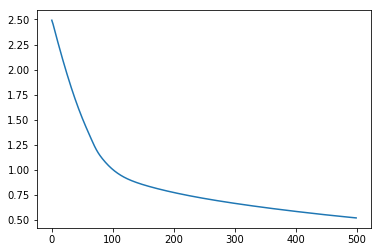

In [10]:
#将图片内嵌在交互窗口，而不是弹出一个图片窗口
%matplotlib inline 
import matplotlib.pyplot as plt
plt.plot(range(500),history.history['loss'])

我们如何评价一个模型训练是否成功？首先，训练过程中训练集loss要下降到一个较小的值，表示模型收敛较好，没有欠拟合；其次，测试集loss最后与训练集loss要尽可能相似，差距越小越好小，说明该模型没有过拟合。

模型成功训练出来后，便可以使用该模型对输入的鸢尾花数据，判断是属于哪一种类别了。这里选择一个最简单的部分，随机读取数据集中的几条数据，看看这个模型会输出什么结果。

我们可以在数据集中随机选择几条，略作修改后进行测试。看看输出的结果对不对。

In [11]:
data=pd.read_csv('./data/iris.csv')
data=data.sample(frac=1).reset_index(drop=True)   #打乱数据的先后顺序
x_input=data.iloc[:,0:-1]
x_input=x_input[:5]
data[:5].head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,4.6,3.1,1.5,0.2,Iris-setosa
1,5.5,2.6,4.4,1.2,Iris-versicolor
2,6.1,2.6,5.6,1.4,Iris-virginica
3,7.2,3.0,5.8,1.6,Iris-virginica
4,5.2,3.4,1.4,0.2,Iris-setosa


In [12]:
model.predict(x_input)

array([[0.81645006, 0.08945613, 0.09409384],
       [0.05531117, 0.4335839 , 0.51110494],
       [0.01924712, 0.40849388, 0.57225895],
       [0.03210969, 0.40018922, 0.56770104],
       [0.9145784 , 0.04051452, 0.04490715]], dtype=float32)

这里的数据是按照“Species_Iris-setosa，Species_Iris-versicolor，Species_Iris-virginica”来排序的。模型输出的数据中，每一列都是估算，哪一列数据大，我们就选择哪一个分类结果。

如果发现不准确，我们继续训练一下模型，即再运行几次，等到loss的值没有显著变化的时候，再来测试模型。一般来说，只要loss值到达0.1左右，识别效果就很不错了。

## 5.利用自带数据集

参考资料：https://keras.io/zh/

**5.1.数据导入**

直接使用sklearn自带的数据集，即导入sklearn.datasets。貌似要从网络下载数据的，第一次使用，要等一会儿。

In [13]:
import keras
from keras import layers
from sklearn.datasets import load_iris
i_data = load_iris()
print(i_data.feature_names)
print(i_data.target_names)
x = i_data.data
y = i_data.target

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


**5.2.数据预处理**

Scikit-Learn已经帮我们把类别编码成了数字，不过是一维数组（None, ）（样本的个数不固定，用None表示），而Keras多分类接受的类别输入是一个二维数组，是y的one-hot编码形式。one-hot编码，简单来讲，就是将原来由0开始的类别值转换成向量，比如3个类别0,1,2，那么类别向量长度为3，以原类别值作为位置索引，对应位置置为1，其它位置置为0，即类别0对应：[1, 0, 0]，类别1对应[0, 1, 0]，类别2对应[0, 0, 1]。全部转换后，y变为二维数组（None，3），可以打印前3行看看。

In [14]:
from keras.utils.np_utils import to_categorical
y = to_categorical(y, 3)
print(y.shape)
print(y[0:3, :])

(150, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


**5.3.定义模型（搭建神经网络）**

In [15]:
from keras.models import Sequential
model = Sequential()
from keras.layers import Dense
model.add(Dense(units=8, input_dim=4, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

**5.4.编译模型**

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**5.5.训练模型**

这段代码可以多运行几次，你会发现loss多值会越来越小。到了0.05后，变化就不大了。

In [21]:
history=model.fit(x, y, epochs=200, batch_size=10)

Epoch 1/200
150/150 [==============================] - 0s 1ms/step - loss: 0.3501 - acc: 0.9600
Epoch 2/200
150/150 [==============================] - 0s 974us/step - loss: 0.3497 - acc: 0.9667
Epoch 3/200
150/150 [==============================] - 0s 916us/step - loss: 0.3467 - acc: 0.9600
Epoch 4/200
150/150 [==============================] - 0s 874us/step - loss: 0.3460 - acc: 0.9667
Epoch 5/200
150/150 [==============================] - 0s 979us/step - loss: 0.3451 - acc: 0.9467
Epoch 6/200
150/150 [==============================] - 0s 994us/step - loss: 0.3427 - acc: 0.9533
Epoch 7/200
150/150 [==============================] - 0s 952us/step - loss: 0.3405 - acc: 0.9600 0s - loss: 0.3139 - acc: 0.966
Epoch 8/200
150/150 [==============================] - 0s 931us/step - loss: 0.3384 - acc: 0.9600
Epoch 9/200
150/150 [==============================] - 0s 980us/step - loss: 0.3368 - acc: 0.9733
Epoch 10/200
150/150 [==============================] - 0s 907us/step - loss: 0.3352 - ac

150/150 [==============================] - 0s 1ms/step - loss: 0.1519 - acc: 0.9800
Epoch 161/200
150/150 [==============================] - 0s 1ms/step - loss: 0.1512 - acc: 0.9800
Epoch 162/200
150/150 [==============================] - 0s 1ms/step - loss: 0.1511 - acc: 0.9867
Epoch 163/200
150/150 [==============================] - 0s 1ms/step - loss: 0.1503 - acc: 0.9800
Epoch 164/200
150/150 [==============================] - 0s 1ms/step - loss: 0.1500 - acc: 0.9800
Epoch 165/200
150/150 [==============================] - ETA: 0s - loss: 0.1366 - acc: 0.990 - 0s 1ms/step - loss: 0.1484 - acc: 0.9800
Epoch 166/200
150/150 [==============================] - 0s 1ms/step - loss: 0.1487 - acc: 0.9800
Epoch 167/200
150/150 [==============================] - ETA: 0s - loss: 0.1618 - acc: 0.975 - 0s 987us/step - loss: 0.1479 - acc: 0.9800
Epoch 168/200
150/150 [==============================] - ETA: 0s - loss: 0.1602 - acc: 0.972 - 0s 1ms/step - loss: 0.1471 - acc: 0.9800
Epoch 169/200
15

History对象会被模型的fit方法返回。用dir(history)的方式，可以得到History对象的所有属性，用vars(history)能够看到所有的属性值。

具体可以参考：https://keras.io/zh/callbacks/#history

In [20]:
history.history['loss']

[2.5524308999379475,
 2.217859665552775,
 1.9382617394129436,
 1.7239010175069174,
 1.5819951931635539,
 1.486048420270284,
 1.4173336664835612,
 1.3688759565353394,
 1.323557710647583,
 1.285457436243693,
 1.2532981475194296,
 1.2227479537328085,
 1.1967514117558797,
 1.1723539352416992,
 1.1520002047220865,
 1.1328341484069824,
 1.116115434964498,
 1.101676638921102,
 1.0855707248051962,
 1.0703706741333008,
 1.0573806881904602,
 1.0443492611249288,
 1.0309179345766704,
 1.018111534913381,
 1.005714436372121,
 0.9936993877092998,
 0.9835897286732992,
 0.9697873552640279,
 0.9579905072848002,
 0.9470068693161011,
 0.9351459582646687,
 0.9239410241444905,
 0.9142089366912842,
 0.9029357393582662,
 0.89182524283727,
 0.8813517451286316,
 0.8719055453936259,
 0.8624210238456727,
 0.8514300942420959,
 0.841620934009552,
 0.8321502248446146,
 0.8240049322446187,
 0.8136581699053447,
 0.805152400334676,
 0.7958961606025696,
 0.7879444162050883,
 0.7792896191279094,
 0.7711658835411072,
 0.7

**5.6.评估模型**

In [22]:
result = model.evaluate(x, y)
print(result[1])

150/150 [==============================] - 0s 1ms/step
0.98


**5.7.模型预测**

predict输出概率矩阵，每一行对应预测值在三个类别上的概率；predict_classes输出类别值，可以全部打印出来看一下。

**注意**：这里采用的是科学计数法。哪个数字小，就说明哪个概率最大。

In [23]:
proba = model.predict(x)
print(proba[0:150])

[[9.94676471e-01 5.32344682e-03 1.37119770e-07]
 [9.92624938e-01 7.37464847e-03 3.18816092e-07]
 [9.92137969e-01 7.86165334e-03 3.76266797e-07]
 [9.91234660e-01 8.76479223e-03 4.98782072e-07]
 [9.94500399e-01 5.49943792e-03 1.49158325e-07]
 [9.95819032e-01 4.18085558e-03 7.34049905e-08]
 [9.91707981e-01 8.29158351e-03 4.31940975e-07]
 [9.94068742e-01 5.93105145e-03 1.81369444e-07]
 [9.89160359e-01 1.08388551e-02 8.65405184e-07]
 [9.93282795e-01 6.71697874e-03 2.50305760e-07]
 [9.95990098e-01 4.00977861e-03 6.58896084e-08]
 [9.93174016e-01 6.82569528e-03 2.60931955e-07]
 [9.92531478e-01 7.46812671e-03 3.29390701e-07]
 [9.89453435e-01 1.05456924e-02 8.05948616e-07]
 [9.97298658e-01 2.70137028e-03 2.37442883e-08]
 [9.97193933e-01 2.80600181e-03 2.61933977e-08]
 [9.95835066e-01 4.16482333e-03 7.26794909e-08]
 [9.94362950e-01 5.63687505e-03 1.58996414e-07]
 [9.96677518e-01 3.32251959e-03 4.05301037e-08]
 [9.94955122e-01 5.04476717e-03 1.19313157e-07]
 [9.95505929e-01 4.49388195e-03 8.847159

In [24]:
classes = model.predict_classes(x)
print(classes[0:150])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 6.模型的保存和导入

**6.1.模型保存**

使用save可以保存训练好的模型，下次导入即可使用。

In [25]:
model.save('./model/2-model-vv.h5')   # HDF5文件

**6.2.模型导入**

使用keras.models的load_model语句载入模型，就可以直接用这个模型来做预测了。

In [26]:
from keras.models import load_model
import pandas as pd
model = load_model('./model/2-model-vv.h5')

In [60]:
#请输入数据，如：5.5,2.6,4.4,1.2
s=input("请输入数据，用“,”分开:")

请输入数据，用“,”分开:5.5,2.6,4.4,1.2


In [61]:
i_data=s.split(',')
i_data

['5.5', '2.6', '4.4', '1.2']

In [62]:
#生成一个空的DataFrame，将输入的列表添加为新行
x=pd.DataFrame(columns=['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width'])
x.loc[0]=i_data

In [63]:
#对应的结果，应该是1，即“Species_Iris-versicolor”
model.predict_classes(x)

array([1])